<a href="https://colab.research.google.com/github/Kanyarat-Jirarat/Multiple-linear-regression/blob/main/ML_AS01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1. Import Libary

In [1]:
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this

*   Raw Data: https://raw.githubusercontent.com/Kanyarat-Jirarat/Multiple-linear-regression/main/Housing.csv





In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Kanyarat-Jirarat/Multiple-linear-regression/main/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# 1.Survey and clean data

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull()
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df_dum = pd.get_dummies(df, drop_first=True)
X = df_dum.drop('price', axis=1)
y = df_dum['price']

In [6]:
df_dum

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


# 2. Train and test split data เป็นสัดส่วน 80:20 โดย 80 สำหรับ Train process และ 20 สำหรับ Test process

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x = df_dum.loc[:,'area':'prefarea_yes']
y = df_dum['price']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [8]:
model = LinearRegression()
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

c = model.coef_

i = model.intercept_

print('ค่าy_predict: ',y_predict)
print('ค่าสัมประสิทธิ์ (Coefficients): ',c)
print('ค่าตัดแกน y (Intercept): ',i)

ค่าy_predict:  [3854980.92314071 6691779.75819529 5528533.34876282 5151301.79115592
 4734247.50770006 3794988.65634925 8094124.64008786 5669776.79220941
 3704068.90105841 5553278.07720037 2805954.17827662 6217256.12910651
 4477237.43185503 7374965.69900134 5977960.09275559 6852162.5372683
 8203464.40916757 4335843.42865803 5941623.52123225 4811254.14164678
 4522866.14013354 2927863.57031142 4449320.92474714 3505678.35265166
 2876379.77134457 3679879.73817863 5141658.65972411 6447046.86141455
 6535625.27346923 4943110.75794082 2930820.86454152 4458389.21190135
 3195693.12076611 2922658.12852132 4738054.28907152 4961017.58985047
 4893222.49954838 3099569.13830216 3222184.18253903 4216655.54208391
 2976408.68408353 5960583.01361846 5916102.73008151 3129802.82283261
 2811902.84311238 4380124.46653425 4770854.32564198 5041779.26486421
 3133696.074389   6416697.60199358 2128946.43183859 6831117.78628467
 6161768.3871114  6493553.06539961 6937407.90022297 5019598.53865782
 6132584.88213853 30

# 3. สร้าง ML regression model และทดสอบ MSE กับ testset (แสดงค่า mse)

In [9]:
mse = mean_squared_error(y_test, y_predict)

print(f"Mean Squared Error:, {mse:,.4f}")

Mean Squared Error:, 1,155,909,646,499.7646


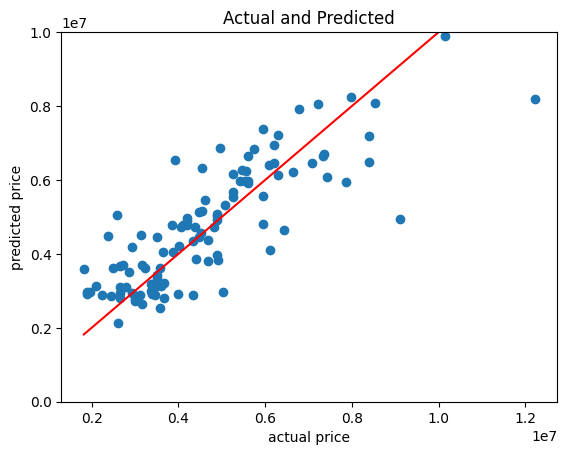

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict)
plt.title('Actual and Predicted')
plt.xlabel('actual price')
plt.ylabel('predicted price')

x_axes = np.linspace(min(y_test),max(y_test),50)
y_axes = x_axes

plt.plot(x_axes, y_axes, color='red')
plt.ylim(0, 10000000)
plt.show()

In [11]:
import pickle
print("Deploy")
pickle.dump(model, open('ML_6610422017.sav','wb') )
from google.colab import files
files.download('ML_6610422017.sav')

Deploy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>